# Parkinsons disease :

Parkinsons disease is one of the most serious diseases.Hence diagnosing it at an earlier stage could help prevent or reduce the effects.In this blog lets see how machine learning classification algorithms are used to predict if a person has parkinsons disease or not.

The data set is collected from the uci machine learning repository.
The link is given below:


https://archive.ics.uci.edu/ml/datasets/parkinsons

In [90]:
import pandas as pd

Importing the dataset:

In [91]:
a=pd.read_csv('/home/govardhan/Downloads/parkinsons.csv')

The dataset consists of 24 attributes and 195 observations in which the target or labels are 'status'

In [110]:
a.head()
a.shape

(195, 24)

All the attributes are numerical except the target variable(which is levels i.e 1 if the person has parkinsons disease and 0 if the person does not has it) and name which is of object datatype.

In [93]:
a.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

The first five observations of the dataset are given below:

In [133]:
a.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


EDA:

The visualization is with respect to the target variable 'status':

Here i have used the seaborn package for visualization

In [111]:
import seaborn as sns


The barplot shown below clearly shows that most of the observations given in the dataset have a status of 1 i.e most of the people's represented in the dataset have been prone to parkinsons disease.
This could also create a bias in the model.

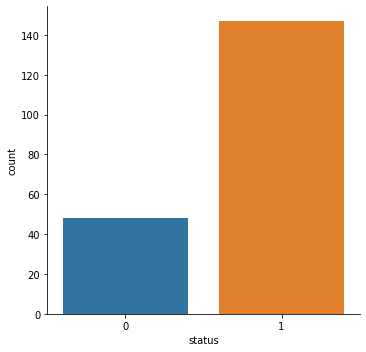

In [117]:
sns.catplot(x='status',kind='count',data=a)

The boxplot shown below helps in identifying the difference in values with respect to the 'status' of the patient.

/home/govardhan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/govardhan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


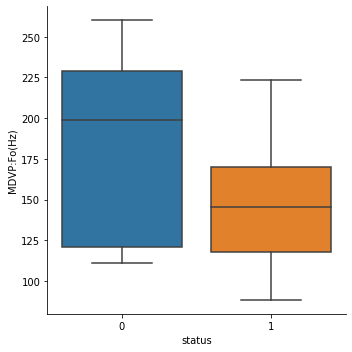

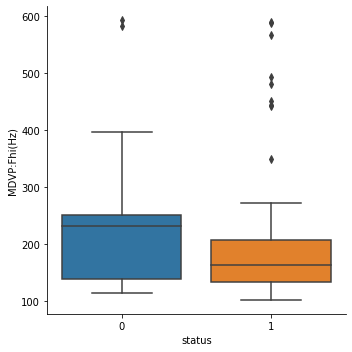

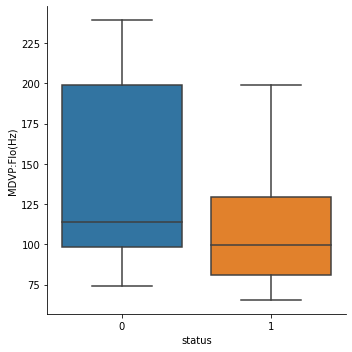

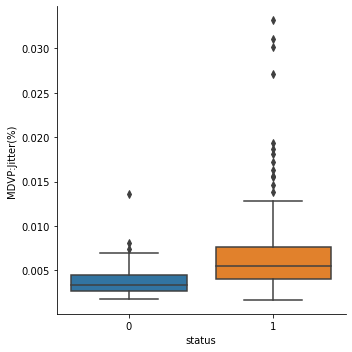

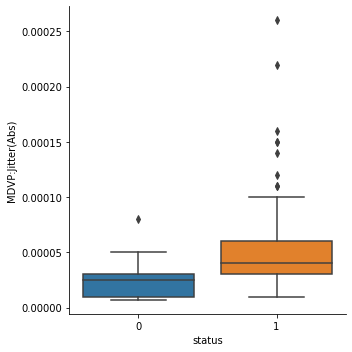

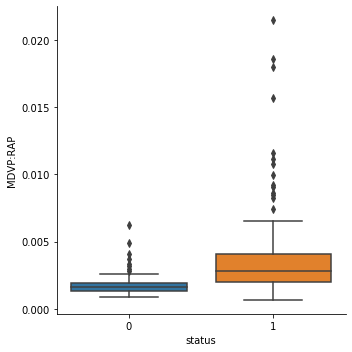

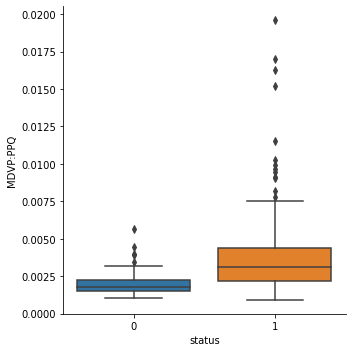

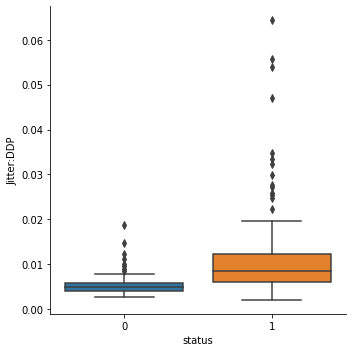

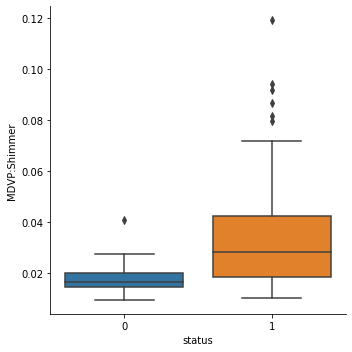

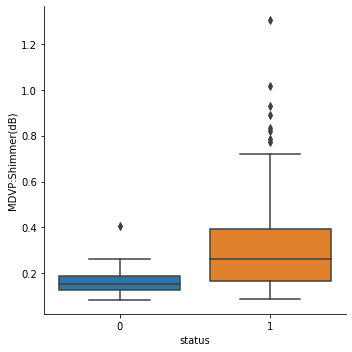

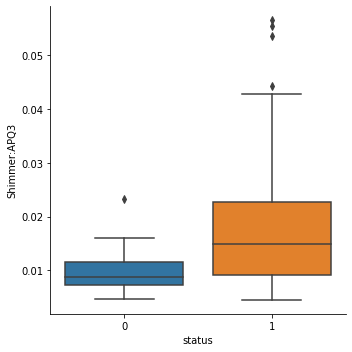

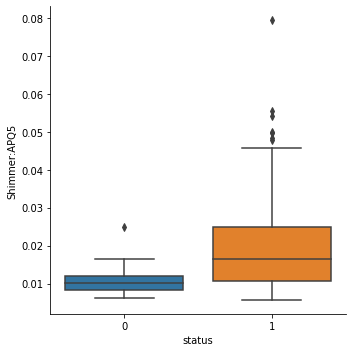

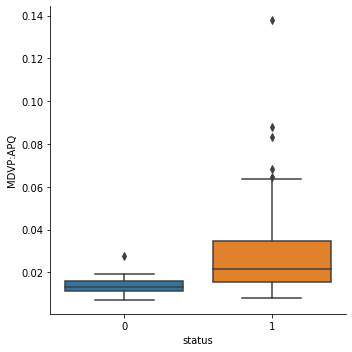

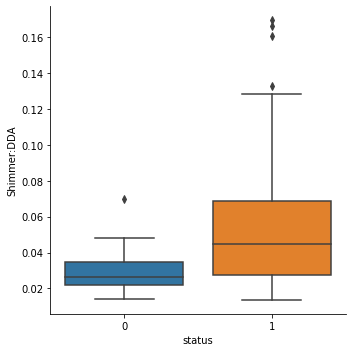

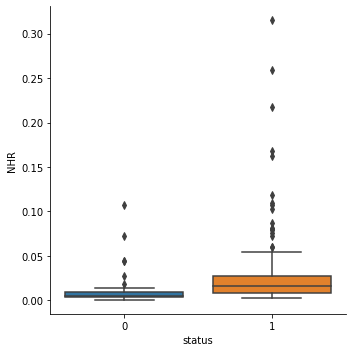

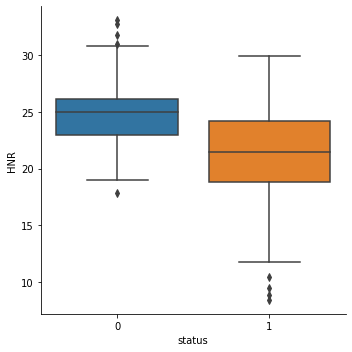

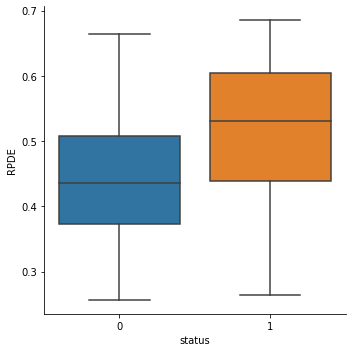

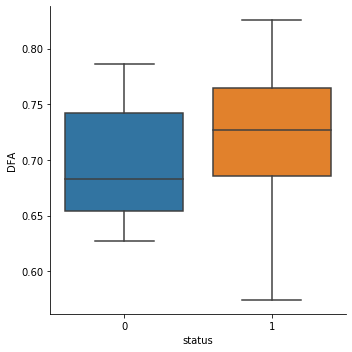

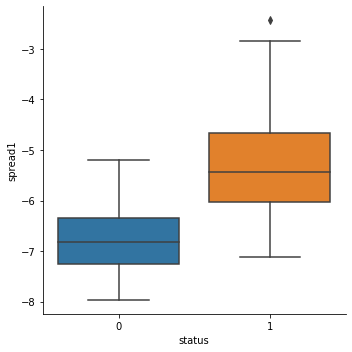

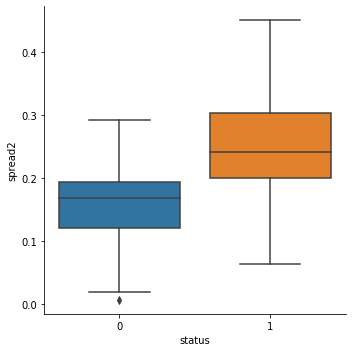

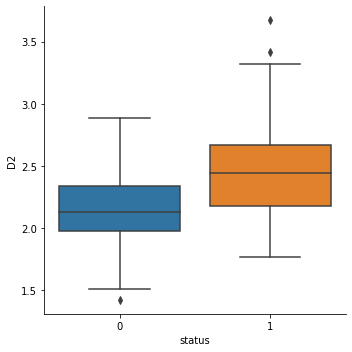

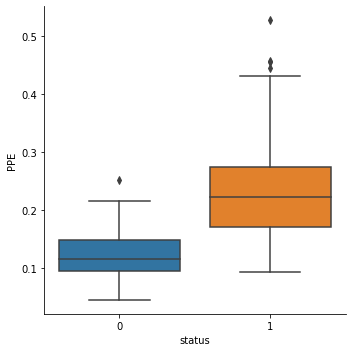

In [114]:
for i in a:
    if i != 'status' and i != 'name':
        sns.catplot(x='status',y=i,kind='box',data=a)

From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

Dropping the attribute 'name' as it provides no useful insight.

In [119]:
b=a.drop(['name'],axis=1)

Importing necessary packages to fit a model :

In [94]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error

The dataset is split into features(the independent variables) and labels(the dependent or target variable):

In [95]:
features=a.drop(['status','name'],axis=1)
labels=a['status']

Let's normalize the data using the minmax scaler to bring the feature variables within the range -1 to 1:

In [97]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

Splitting of dataset:

Here the split for training data is 80% and testing is 20% and a random state of 5 is given so aa to pick values at random at a count of 5.

In [98]:

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

Importing various classification algorithm to find which algorithm suits the best for the dataset:

In [99]:
#cross validation:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier


Cross validation:

The cross validation score of various classification algorithms are used to check the average accuracy of the algorithms:

In [100]:
lr=cross_val_score(LogisticRegression(),x_train,y_train)
xgbc=cross_val_score(XGBRFClassifier(),x_train,y_train)
xgb=cross_val_score(XGBClassifier(),x_train,y_train)
svm=cross_val_score(SVC(),x_train,y_train)
#nb=cross_val_score(MultinomialNB(),x_train,y_train)
dtc=cross_val_score(DecisionTreeClassifier(),x_train,y_train)
adb=cross_val_score(AdaBoostClassifier(),x_train,y_train)
bbc=cross_val_score(BaggingClassifier(),x_train,y_train)
etc=cross_val_score(ExtraTreesClassifier(),x_train,y_train)
gbc=cross_val_score(GradientBoostingClassifier(),x_train,y_train)
rfc=cross_val_score(RandomForestClassifier(),x_train,y_train)
#vc=cross_val_score(VotingClassifier(estimators),x_train,y_train)

/home/govardhan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/govardhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/govardhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/govardhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/govardhan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.

In [101]:
print('log reg',lr,lr.mean())
print('xgbd',xgbc,xgbc.mean())
print('xgb',xgb,xgb.mean())
print('svm',svm,svm.mean())
#print('nb',nb,nb.mean)
print('dtc',dtc,dtc.mean())
print('adb',adb,adb.mean())
print('bbc',bbc,bbc.mean())
print('etc',etc,etc.mean())
print('gbc',gbc,gbc.mean())
print('rfc',rfc,rfc.mean())
#print('vc',vc,vc.mean)

log reg [0.90566038 0.88461538 0.80392157] 0.8647324435337754
xgbd [0.90566038 0.88461538 0.8627451 ] 0.8843402866710303
xgb [0.9245283  0.86538462 0.88235294] 0.8907552861492928
svm [0.86792453 0.80769231 0.8627451 ] 0.8461206446778035
dtc [0.88679245 0.84615385 0.84313725] 0.8586945179619986
adb [0.86792453 0.80769231 0.80392157] 0.8265128015405484
bbc [0.90566038 0.90384615 0.82352941] 0.8776786476564501
etc [0.90566038 0.92307692 0.92156863] 0.916768642628798
gbc [0.90566038 0.88461538 0.90196078] 0.8974121820958669
rfc [0.90566038 0.88461538 0.76470588] 0.8516605481089389


All the cross valildation scores of various algorithms are shown above.
Here the xgboost and the extra tree classifier algorithms  has a high rate of accuracy of 89% and 91% respectively,hence we will use both these algorithms to fit two models and find the best model out of them.

# XGboost:

First a model is fit using the xgboost algorithm(no parameter tuning is done).

In [102]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [103]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [104]:

    y_pred=model.predict(x_test)
    print(accuracy_score(y_test, y_pred)*100)

92.3076923076923


After the model is fit the accuracy of the training data is 100% and the testing data is 92%.
92% of the time this model would correctly predict the status of the patient.

# Extra trees classifier:

Here the extratrees classifier algorithm is used to fit a model(no parameter tuning is done):

In [105]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

/home/govardhan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [106]:
 y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

97.43589743589743


In [107]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


Comparing the xgboost algorithm , the extra trees classifier has a better accuracy. In this model the rate of accuracy for the test data is 97% hence this model is the best suited for this dataset.

In [109]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

[[ 9  1]
 [ 0 29]]


The classification report shown above says that the model has predicted 100% for patients who are not having parkinsons disease and a accuuracy of 97% for person's who are having parkinsons disease.
Also the confusion matrix shown above shows that only one value has been mis-classified.

The predicted results of the test data are shown below:

In [108]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,1
1,1
2,0
3,1
4,0
5,1
6,1
7,1
8,1
9,0


Therefore, the extra trees classifier algorithm is used in this model to predict the status of the patient.
This model could be very helpful in early diagnosis of the disease.

Thanks for reading :)